In [48]:
%matplotlib inline

In [49]:
from clawpack.geoclaw import dtopotools
import numpy as np
import matplotlib.pyplot as pl

In [50]:
# add two subfaults
# conjoined isosceles triangles

x0 = 100.4
x1 = 100.6

y0 = -.1
y1 = .1

d0 = 3e3
d1 = 4e3
d2 = 2e3

x0b = x0 - .2
x1b = x1 + .2
y0b = y0 - .2
y1b = y1 + .2

#subfault0
subfault0 = dtopotools.SubFault()
subfault0.slip = 1.
subfault0.coordinate_specification = 'triangular'
subfault0._corners = [[x1,y0,-d0],[x0,y1,-d0],[x1,y1,-d1]]
subfault0.calculate_geometry_triangles()

#subfault1
subfault1 = dtopotools.SubFault()
subfault1.slip = 1.
subfault1.coordinate_specification = 'triangular'
subfault1._corners = [[x0,y1,-d0],[x1,y0,-d0],[x0,y0,-d2]]
subfault1.calculate_geometry_triangles()

In [51]:
print 'subfault0 strike: ', subfault0.strike
print 'subfault1 strike: ', subfault1.strike
print 'strike difference: ', subfault0.strike - subfault1.strike

subfault0 strike:  135.000043633
subfault1 strike:  -44.9999563667
strike difference:  180.0


In [52]:
print 'subfault0 dip: ', subfault0.dip
print 'subfault1 dip: ', subfault1.dip

subfault0 dip:  45.0000001146
subfault1 dip:  45.0000001148


In [53]:
print 'subfault0 unit slip vector: ', subfault0._get_unit_slip_vector()
print 'subfault1 unit slip vector: ', subfault1._get_unit_slip_vector()

subfault0 unit slip vector:  [ 0.50000038  0.49999962  0.70710678]
subfault1 unit slip vector:  [-0.50000038 -0.49999962  0.70710678]


In [54]:
subfault0._get_leg_angles()

([False, False, True],
 [[100.6, -0.1, -3000.0], [100.4, 0.1, -3000.0], [100.6, -0.1, -3000.0]],
 [[100.4, 0.1, -3000.0], [100.6, 0.1, -4000.0], [100.6, 0.1, -4000.0]],
 [-0.78539740185345852, 1.5707963267948966, -0.0],
 [1.5707963267948966, 1.5258357813268928, 1.5258358497134603])

In [55]:
fault = dtopotools.Fault()
rake = 90.
subfault0.strike = 0.
subfault1.strike = 0.
subfault1.dip = subfault0.dip
subfault0.rake=rake
subfault1.rake=rake #- 180. 

In [56]:
subfault0._get_leg_angles()

([False, False, True],
 [[100.6, -0.1, -3000.0], [100.4, 0.1, -3000.0], [100.6, -0.1, -3000.0]],
 [[100.4, 0.1, -3000.0], [100.6, 0.1, -4000.0], [100.6, 0.1, -4000.0]],
 [-0.78539740185345852, 1.5707963267948966, -0.0],
 [1.5707963267948966, 1.5258357813268928, 1.5258358497134603])

In [57]:
subfault1._get_leg_angles()

([False, True, False],
 [[100.4, 0.1, -3000.0], [100.4, -0.1, -2000.0], [100.4, -0.1, -2000.0]],
 [[100.6, -0.1, -3000.0], [100.6, -0.1, -3000.0], [100.4, 0.1, -3000.0]],
 [2.3561952517363349, 1.5707963267948966, 0.0],
 [1.5707963267948966, 1.5258357813268928, 1.5258358497134603])

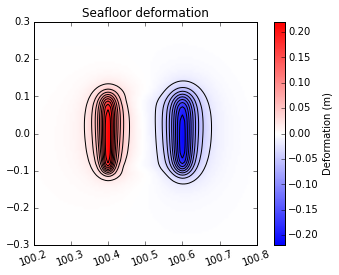

In [58]:
x = np.linspace(x0b,x1b,100)
y = np.linspace(y0b,y1b,100)
fault.subfaults = []
fault.subfaults.append(subfault0)
fault.subfaults.append(subfault1)
dtopo = fault.create_dtopography(x,y,times =[0.]);
dtopo.plot_dZ_colors(0.);

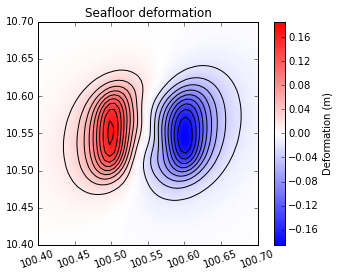

In [28]:
fault = dtopotools.Fault()
rake = 90.
subfault0.rake=rake
subfault1.rake=rake #+ 180.

x = np.linspace(100.4,100.7,50)
y = np.linspace(10.4,10.7,50)
fault.subfaults = []
fault.subfaults.append(subfault0)
fault.subfaults.append(subfault1)
dtopo = fault.create_dtopography(x,y,times =[0.])
dtopo.plot_dZ_colors(0.)

In [13]:
subfault0._get_unit_slip_vector()[0]

0.25696804388045091

In [14]:
dtopo.dZ[0.,:,:].max()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


9904.1633558383692

In [ ]:
subfault0.strike

In [ ]:
reverse_list,O1_list,O2_list,alpha_list,beta_list = subfault0._get_leg_angles()
xx = np.linspace(100.4,100.7,100)
X1,X2 = np.meshgrid(xx,xx)
X3= np.ones(X1.shape)*(0.)

alpha = alpha_list[0]
beta = beta_list[0]
Olong = O1_list[0][0]
Olat = O1_list[0][1]
Odepth = - O1_list[0][2]
Y1,Y2,Y3,Z1,Z2,Z3,Yb1,Yb2,Yb3,Zb1,Zb2,Zb3 = \
    subfault0._get_halfspace_coords(X1,X2,X3,alpha,beta,Olong,Olat,Odepth)

import matplotlib.pyplot as pl

pl.plot(Y1,Y2,'k');

In [ ]:
abs(Odepth)

In [ ]:
reverse_list

In [ ]:
1/np.sqrt(Yb1**2 + Yb2**2 + Yb3**2)

In [49]:
v11 = np.zeros(X1.shape)
v21 = np.zeros(X1.shape)
v31 = np.zeros(X1.shape)

v12 = np.zeros(X1.shape)
v22 = np.zeros(X1.shape)
v32 = np.zeros(X1.shape)

v13 = np.zeros(X1.shape)
v23 = np.zeros(X1.shape)
v33 = np.zeros(X1.shape)

for j in range(3):
    alpha = alpha_list[j]
    beta = beta_list[j]
    
    Olong = O1_list[j][0]
    Olat = O1_list[j][1]
    Odepth = -O1_list[j][2]
    
    if reverse_list[j]:
        sgn = -1.
    else:
        sgn = 1.
    
    Y1,Y2,Y3,Z1,Z2,Z3,Yb1,Yb2,Yb3,Zb1,Zb2,Zb3 = \
        subfault0._get_halfspace_coords(X1,X2,X3,alpha,beta,Olong,Olat,Odepth)

    w11,w12,w13,w21,w22,w23,w31,w32,w33 = \
                            subfault0._get_angular_dislocations(Y1,Y2,Y3,Z1,Z2,Z3,\
                                  Yb1,Yb2,Yb3,Zb1,Zb2,Zb3,beta,Odepth)
        
#     w11,w12,w13,w21,w22,w23,w31,w32,w33 = \
#     subfault0._get_angular_dislocations_surface(Y1,Y2,Y3,beta,Odepth)
    
    w11,w12,w13,w21,w22,w23,w31,w32,w33 = \
                subfault0._coord_transform(w11,w12,w13,w21,w22,w23,w31,w32,w33,alpha)
    
    
    v11 = v11 + sgn*w11
    v21 = v21 + sgn*w21
    v31 = v31 + sgn*w31
    v12 = v12 + sgn*w12
    v22 = v22 + sgn*w22
    v32 = v32 + sgn*w32
    v13 = v13 + sgn*w13
    v23 = v23 + sgn*w23
    v33 = v33 + sgn*w33
    
    Olong = O2_list[j][0]
    Olat = O2_list[j][1]
    Odepth = -O2_list[j][2]
    
    Y1,Y2,Y3,Z1,Z2,Z3,Yb1,Yb2,Yb3,Zb1,Zb2,Zb3 = \
        subfault0._get_halfspace_coords(X1,X2,X3,alpha,beta,Olong,Olat,Odepth)

    w11,w12,w13,w21,w22,w23,w31,w32,w33 =subfault0._get_angular_dislocations(Y1,Y2,Y3,Z1,Z2,Z3,\
                                  Yb1,Yb2,Yb3,Zb1,Zb2,Zb3,beta,Odepth)


#     w11,w12,w13,w21,w22,w23,w31,w32,w33 = \
#     subfault0._get_angular_dislocations_surface(Y1,Y2,Y3,beta,Odepth)

    w11,w12,w13,w21,w22,w23,w31,w32,w33 = \
                subfault0._coord_transform(w11,w12,w13,w21,w22,w23,w31,w32,w33,alpha)
        
    
    v11 = v11 - sgn*w11
    v21 = v21 - sgn*w21
    v31 = v31 - sgn*w31
    v12 = v12 - sgn*w12
    v22 = v22 - sgn*w22
    v32 = v32 - sgn*w32
    v13 = v13 - sgn*w13
    v23 = v23 - sgn*w23
    v33 = v33 - sgn*w33        

        
#     v11 = v11 - sgn*w13
#     v21 = v21 - sgn*w23
#     v31 = v31 - sgn*w33
#     v12 = v12 - sgn*w13
#     v22 = v22 - sgn*w23
#     v32 = v32 - sgn*w33
#     v13 = v13 - sgn*w13
#     v23 = v23 - sgn*w23
#     v33 = v33 - sgn*w33

    

NameError: name 'X1' is not defined

In [ ]:
O1_list
O2_list

In [ ]:
f,ax = pl.subplots(nrows=3,ncols=3,figsize=(12,12))
ax[0][0].contour(X1,X2,v11,20);
ax[0][1].contour(X1,X2,v12,20);
ax[0][2].contour(X1,X2,-v13,20);
ax[1][0].contour(X1,X2,v21,20);
ax[1][1].contour(X1,X2,v22,20);
ax[1][2].contour(X1,X2,-v23,20);
ax[2][0].contour(X1,X2,v31,20);
ax[2][1].contour(X1,X2,v32,20);
ax[2][2].contour(X1,X2,-v33,20);

f.savefig('dislocations_triangular.png',dpi=150)
# pl.colorbar();
pl.axis('equal');


In [ ]:
pl.contour(X1,X2,1.*v33+ 0.*v22 + 0.*v31,30);
pl.colorbar();
pl.axis('equal');

In [ ]:
v13

In [ ]:
np.meshgrid?

In [ ]:
subfault0.corners

In [ ]:
from numpy import pi

# subfault0._get_halfspace_coords?
X1 = np.array([0.])
X2 = np.array([0.])
X3 = np.array([0.])

Olong = subfault0.corners[0][0]
Olat = subfault0.corners[0][1]
Odepth = subfault0.corners[0][2]

Y1,Y2,Y3,Z1,Z2,Z3,Yb1,Yb2,Yb3,Zb1,Zb2,Zb3 = \
    subfault0._get_halfspace_coords(X1,X2,X3,np.pi/2.,np.pi/3,Olong,Olat,Odepth)

In [ ]:
import numpy as np

xx = np.linspace(0,1,10)

In [ ]:
1/xx

In [ ]:
0.5**2 + 0.8660254**2

In [ ]:
# choose number of Gaussian quadrature points
subfault0.n_gauss_pts = 20
subfault1.n_gauss_pts = 40

In [ ]:
fault0 = dtopotools.Fault(subfaults=[subfault0,subfault1])

fault0.plot_subfaults(slip_color=True,plot_rake=True,cmin_slip=0.,cmax_slip=5.)

In [ ]:
print fault0.Mw()
print subfault0.length * subfault0.width * (dtopotools.LAT2METER)**2

In [ ]:
subfault0.rake * dtopotools.DEG2RAD / np.pi

In [ ]:
# generate dtopo
x,y = fault0.create_dtopo_xy(buffer_size=0.1)
dtopo = fault0.create_dtopography(x,y,times=[0.])

# plot deformation dZ at time 0.
dtopo.plot_dZ_colors(0.)

In [ ]:
import numpy as np

In [ ]:
x = np.linspace(-1.,1.,200)
y = np.linspace(-1.,1.,200)

Dtopo = subfault0.okada(x,y)

In [ ]:
print subfault0.dtopo.dZ[0,:,:].shape
print subfault0.slip
print subfault0.dip

In [ ]:
dtopotools.LAT2METER

In [ ]:
import matplotlib.pyplot as pl

# pl.pcolor(Dtopo.X,Dtopo.Y,Dtopo.dZ[0,:,:])
# pl.colorbar()

Dtopo.plot_dZ_colors(0.)

In [ ]:
x,w = subfault0.gauss_pts

In [ ]:
np.array?

In [ ]:
slab_pts = np.loadtxt('cas_slab1.0_clip.xyz')

In [ ]:
from scipy.spatial import Delaunay

tri = Delaunay(slab_pts[:,0:2])


In [ ]:
I = np.invert(np.isnan(slab_pts[:,2]))
c4e = []
for j in range(tri.nsimplex):
    node_list = tri.simplices[j,:].tolist()
    if I[node_list[0]] and I[node_list[1]] and I[node_list[2]] :
        c1 = slab_pts[node_list[0],:].tolist()
        c2 = slab_pts[node_list[1],:].tolist()
        c3 = slab_pts[node_list[2],:].tolist()
        if (c2[1] > 49.7) and (c2[0] > -125.):
            c4e.append([c1,c2,c3])

In [ ]:
import copy

subfaults = []



# j = 20

# subfault0 = dtopotools.SubFault()
# subfault0.coordinate_specification = 'triangular'
# subfault0.slip = 5.
# subfault0._corners = c4e[j]
# subfault0.calculate_geometry_triangles()
# subfaults.append(copy.copy(subfault0))

# N = min([100,len(c4e)])
N = len(c4e)
for j in range(N):
    subfault0 = dtopotools.SubFault()
    subfault0.coordinate_specification = 'triangular'
    subfault0.slip = 5.
    subfault0._corners = c4e[j]
    subfault0.calculate_geometry_triangles()
    subfaults.append(copy.copy(subfault0))


In [ ]:
fault1 = dtopotools.Fault(subfaults=subfaults)

In [ ]:
fault1.containing_rect()

In [ ]:
import matplotlib.pyplot as pl

f,ax = pl.subplots(figsize=(20,20))
ax = fault1.plot_subfaults(axes=ax,plot_rake=True,slip_color=False,cmin_slip=0., cmax_slip=5.,verbose=True)

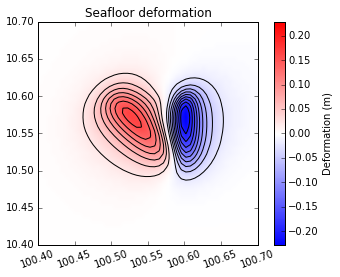

In [70]:
subfault0.rake = 90.
subfault0.strike = 0.
subfault0.dip = 0.
# subfault0.slip = 1.
x = np.linspace(x0-0.1,x1+0.1,50)
y = np.linspace(y0-0.1,y1+0.1,50)
dtopo = subfault0.okada(x,y)
dtopo.plot_dZ_colors(0.)

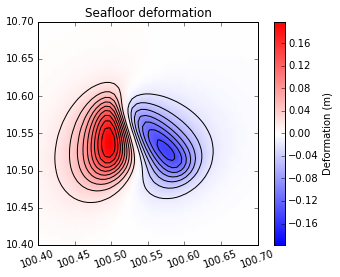

In [71]:
subfault1.rake = 90.
subfault1.strike = 0.
subfault1.dip = 0.
# subfault1.slip = 1.
x = np.linspace(100.4,100.7,50)
y = np.linspace(10.4,10.7,50)
dtopo = subfault1.okada(x,y)
dtopo.plot_dZ_colors(0.)